Quick introduction to `numpy` and `scikit-learn`
================================================

This IPython notebook is a brief introduction to useful Python libraries for working with data.
CSV is an informal format for tabular data. Python's `csv` module is useful for loading datasets.

Loading data
------------

We will define a function to load space-separated table of data, with any number of numeric columns, 
and a categorical last column. This is useful for our familiar iris dataset.

In [1]:
import csv

def load_table(path):
    reader = csv.reader(open(path), delimiter=' ')
    # Return a list of data, where we convert each row to a pair.
    return [ (row[0:-1], row[-1]) for row in reader ]
    

The function `load_table` returns a list of pairs. The function `zip` can convert between a list of pairs and a pair of lists:

In [2]:
a = [1,2,3] ; b = [4,5,6]
c = list(zip(a,b))
print(c)

[(1, 4), (2, 5), (3, 6)]


In [3]:
x, y = zip(*c)
print(x)
print(y)

(1, 2, 3)
(4, 5, 6)


Using `zip` and `load_table` we will load the last column into `Y`, and all the other columns in `X`.

In [4]:
X, Y = zip(*load_table('iris-train.txt'))
print(X[0])
print(Y[0])

['5.5', '2.6', '4.4', '1.2']
versicolor


The rows of `X` hold the numbers as strings. We want to convert the whole of `X` into a 2D array of `float`s.

Numpy arrays
------------


With the library `numpy` we can work conveniently with such data. Let's convert X into an array:


In [5]:
import numpy
X = numpy.array(X, dtype='float')
X

array([[ 5.5,  2.6,  4.4,  1.2],
       [ 5.6,  2.7,  4.2,  1.3],
       [ 4.9,  3.1,  1.5,  0.1],
       [ 5.6,  2.8,  4.9,  2. ],
       [ 6. ,  2.2,  4. ,  1. ],
       [ 7.7,  2.6,  6.9,  2.3],
       [ 6.7,  3.1,  4.4,  1.4],
       [ 5.6,  3. ,  4.5,  1.5],
       [ 4.9,  2.5,  4.5,  1.7],
       [ 4.9,  3.1,  1.5,  0.1],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 6.7,  2.5,  5.8,  1.8],
       [ 6.9,  3.1,  5.4,  2.1],
       [ 5.7,  3. ,  4.2,  1.2],
       [ 4.8,  3.4,  1.9,  0.2],
       [ 5.1,  3.5,  1.4,  0.2],
       [ 5.1,  3.5,  1.4,  0.3],
       [ 5.4,  3. ,  4.5,  1.5],
       [ 6.8,  3.2,  5.9,  2.3],
       [ 6.7,  3.1,  5.6,  2.4],
       [ 6.5,  3.2,  5.1,  2. ],
       [ 5.8,  2.7,  5.1,  1.9],
       [ 5.7,  2.5,  5. ,  2. ],
       [ 4.6,  3.2,  1.4,  0.2],
       [ 7.3,  2.9,  6.3,  1.8],
       [ 7.7,  2.8,  6.7,  2. ],
       [ 6.2,  3.4,  5.4,  2.3],
       [ 7.1,  3. ,  5.9,  2.1],
       [ 6.4,  3.1,  5.5,  1.8],
       [ 6. ,  3. ,  4.8,  1.8],
       [ 6

We can easily extract columns and rows.
Extract first row:

In [6]:
X[0, :]

array([ 5.5,  2.6,  4.4,  1.2])

Extract second column:

In [7]:
X[:, 1]

array([ 2.6,  2.7,  3.1,  2.8,  2.2,  2.6,  3.1,  3. ,  2.5,  3.1,  3.4,
        2.5,  3.1,  3. ,  3.4,  3.5,  3.5,  3. ,  3.2,  3.1,  3.2,  2.7,
        2.5,  3.2,  2.9,  2.8,  3.4,  3. ,  3.1,  3. ,  2.7,  3. ,  2.3,
        3. ,  3.4,  3.2,  3.7,  2.8,  3.4,  3.8,  3.6,  4.4,  2.7,  2.8,
        3.4,  3. ,  3.2,  3.1,  2.8,  2.3])

Extract the first five rows of the second column:

In [8]:
u = X[0:5:,1]
u

array([ 2.6,  2.7,  3.1,  2.8,  2.2])

With `numpy` it is easy to apply an operation to all elements of an array.
For example take the square root of each element.

In [9]:
numpy.sqrt(u)

array([ 1.61245155,  1.64316767,  1.76068169,  1.67332005,  1.4832397 ])

Multiply each element by 2:

In [10]:
v = 2*u

We can also perform various standard operations on vectors and matrices.
For example add two vectors.

In [11]:
u + v

array([ 7.8,  8.1,  9.3,  8.4,  6.6])

Or multiply them elementwise:

In [12]:
u * v

array([ 13.52,  14.58,  19.22,  15.68,   9.68])

Compute the dot product:

In [13]:
print(numpy.dot(u, v))

72.68


Scikit-learn
------------

This machine-learning library implements a number of basic learning algorithms and other useful functions for learning from data. It is integrated with `numpy` and uses `numpy` data structures.

Most of the learning algorithms have a similar interface. This is how we usually work.

First import models:

In [14]:
from sklearn.linear_model import SGDRegressor

Now we initialize a model, specifying some options: in this case, a linear model trained via stochastic gradient descent, with 10 iterations and squared loss function.

In [15]:
model = SGDRegressor(n_iter=3, loss='squared_loss', random_state=123)

Training models is done with the function `fit`. It accepts two arguments: inputs and targets. 
Next, we will learn to predict the fourth feature (Petal Width) from the first three. 

In [16]:
X[:,3]

array([ 1.2,  1.3,  0.1,  2. ,  1. ,  2.3,  1.4,  1.5,  1.7,  0.1,  0.3,
        1.8,  2.1,  1.2,  0.2,  0.2,  0.3,  1.5,  2.3,  2.4,  2. ,  1.9,
        2. ,  0.2,  1.8,  2. ,  2.3,  2.1,  1.8,  1.8,  1.6,  1.5,  1. ,
        2.1,  0.2,  0.2,  0.2,  1.3,  2.4,  0.3,  0.2,  0.4,  1.8,  2.4,
        1.6,  1.7,  2.3,  0.1,  1.3,  1.3])

In [17]:
X_reg = X[:,0:3]
Y_reg = X[:,3]
model.fit(X_reg, Y_reg)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', n_iter=3, penalty='l2', power_t=0.25,
       random_state=123, shuffle=True, verbose=0, warm_start=False)

Once the model is trained, we can predict targets for new data. Let's load the developement data:

In [18]:
X_dev, Y_dev = zip(*load_table('iris-dev.txt'))
X_dev = numpy.array(X_dev, dtype='float')
X_reg_dev = X_dev[:,0:3]
Y_reg_dev = X_dev[:,3]

And get predictions for X_dev:

In [19]:
Y_dev_pred = model.predict(X_reg_dev)
print(Y_dev_pred[0:5])

[ 0.58151673  0.59569244  1.77934487  1.76217756  2.23902208]


Calculating Mean Squared Error is easy:

In [20]:
numpy.mean((Y_reg_dev-Y_dev_pred)**2)

0.091871416844427484

Let's also compute Mean Absolute Error:

In [21]:
def mae(y, y_pred):
    return numpy.mean(numpy.abs(y-y_pred))
mae(Y_reg_dev, Y_dev_pred)

0.26103884766184843

Our model could be doing better. Let's check how many iterations get the lowest error on development set.

By setting `n_iter=1` and `warm_start=True` will can train the model for one iteration, check how well it does on development data, train it for another iteration, and so on.

In [44]:
M = SGDRegressor(n_iter=1, loss='squared_loss', random_state=99, warm_start=True)
error = []
for i in range(1, 50):
    M.fit(X_reg, Y_reg)
    Y_dev_pred = M.predict(X_reg_dev)
    error.append((i, mae(Y_reg_dev, Y_dev_pred)))
error

[(1, 0.31290779162935706),
 (2, 0.25029795956552092),
 (3, 0.21613297541917692),
 (4, 0.19751270299118906),
 (5, 0.18683603975743351),
 (6, 0.18414052513137272),
 (7, 0.18332804855423379),
 (8, 0.18257352525396076),
 (9, 0.18236616249165505),
 (10, 0.18208030850262652),
 (11, 0.18195931132258111),
 (12, 0.18174293251127513),
 (13, 0.18146932455381409),
 (14, 0.18116232937508045),
 (15, 0.18083683008845935),
 (16, 0.18050210162735658),
 (17, 0.18016390850884012),
 (18, 0.17982581819659049),
 (19, 0.17949002336311715),
 (20, 0.17915785668174777),
 (21, 0.17883011311656774),
 (22, 0.17850725169008164),
 (23, 0.17818952179399747),
 (24, 0.17787704225787437),
 (25, 0.17757006820902813),
 (26, 0.17728878033460863),
 (27, 0.17701234460295051),
 (28, 0.17674070820830534),
 (29, 0.17647380642718222),
 (30, 0.17621156764489843),
 (31, 0.17595391649235087),
 (32, 0.17570077579980861),
 (33, 0.17545206781024483),
 (34, 0.1752077149292543),
 (35, 0.17499477115286069),
 (36, 0.17478617410300898),
 (

Pylab
-----

It would be nice to plot this. We can do this with the library `pylab`. We can activate pylab inside an IPython notebook like this:

In [45]:
%pylab --no-import-all inline 

Populating the interactive namespace from numpy and matplotlib


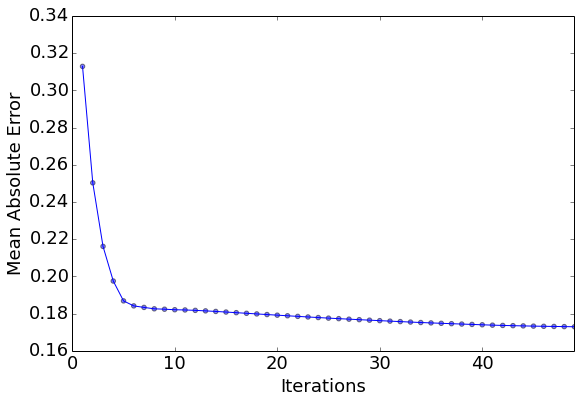

In [46]:
pylab.figure(figsize(9,6))
pylab.rcParams['font.size'] = 18
pylab.xlabel("Iterations")
pylab.ylabel("Mean Absolute Error")
# We need x and y coordinates
x, y = zip(*error)
pylab.xlim((0, max(x)))
# Add points
pylab.scatter(x, y, alpha=0.5)
# Connect them with line
pylab.plot(x, y)

## Classification

Scikit learn also has many different models for classification. Let's use the Perceptron classifier model to classify the iris dataset.

In [47]:
from sklearn.linear_model import Perceptron
model = Perceptron(n_iter=5)
model.fit(X, Y)

Perceptron(alpha=0.0001, class_weight=None, eta0=1.0, fit_intercept=True,
      n_iter=5, n_jobs=1, penalty=None, random_state=0, shuffle=True,
      verbose=0, warm_start=False)

In [48]:
Y_dev_pred = model.predict(X_dev)

For classification, we will compute the error rate:

In [49]:
numpy.mean(Y_dev_pred != Y_dev)

0.68000000000000005

This is terrible. Let's try varying the number of iterations.

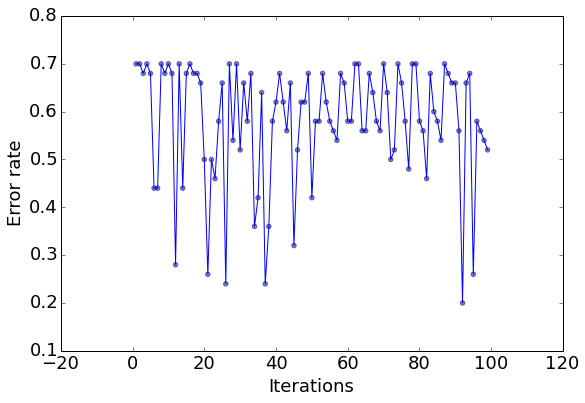

In [50]:
error = []
M = Perceptron(n_iter=1, random_state=321, warm_start=True)
for i in range(1, 100):
    M.fit(X, Y)
    Y_dev_pred = M.predict(X_dev)
    error.append((i, numpy.mean(Y_dev != Y_dev_pred)))
pylab.figure(figsize(9,6))
pylab.rcParams['font.size'] = 18
pylab.xlabel("Iterations")
pylab.ylabel("Error rate")
# We need x and y coordinates
x, y = zip(*error)
#pylab.xlim((0, max(x)))
# Add points
pylab.scatter(x, y, alpha=0.5)
# Connect them with line
pylab.plot(x, y)

On this small dataset, Perceptron is a bit erratic.

Exercises
---------

### Data manipulation


Let's load the boston house price dataset included with sklearn. 
The targets are in the array `boston.target` and the inputs in the array `boston.data`.

In [117]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston['DESCR'])

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [41]:
boston.target.shape

(506,)

In [42]:
boston.data.shape

(506, 13)

- Extract the first 350 examples for training and store them in `X` and `Y`.
- Store the remaining examples in `X_dev` and `Y_dev`

### Modeling

We will track the performance of SGDRegressor on this dataset over a 100 iterations. We will repeat this for several different values of training rate. Use the following initialization, and vary the value of learning rate by specifying `eta0`.

In [144]:
M = SGDRegressor(n_iter=1, 
                 warm_start=True, 
                 loss='squared_loss',
                 random_state=123,
                 learning_rate='constant',
                 eta0=0.01)

Find a constant learning rate which does not cause the model to diverge.

For small datasets, it's simpler and easier to just use the `LinearRegression` model from `sklearn.linear_model`. This model uses the specialized linear regression formula to find the best weights
instead of a generic algorithm like stochastic gradient descent.

- Fit the LinearRegression model on the iris and boston dataset, and report error on development data.

In [145]:
from sklearn.linear_model import LinearRegression

14.6467635856
